<a href="https://colab.research.google.com/github/Gaurab-B/MRS/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

#### Summer 2023
#### Dataset IMDB 5000 Movie Dataset

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [181]:
path2 = "https://github.com/Gaurab-B/MRS/blob/main/movie_metadata.csv?raw=true"
movie_data = pd.read_csv(path2)

In [182]:
# check the basic dataset format
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [183]:
# check the column names
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [184]:
# check the original dataset shape
movie_data.shape

(5043, 28)

In [185]:
# check the dataset information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [186]:
# check the missing data in the dataset in terms of columns
movie_data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [187]:
# check the unique feature values of the color feature column
movie_data.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [188]:
movie_data.director_name.unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Benjamin Roberds', 'Daniel Hsia'], dtype=object)

In [189]:
len(movie_data.director_name.unique())

2399

## Data Cleaning

In this project, we consider partial feature columns of the original dataset to build the movie recommendation system

In [190]:
movies = movie_data.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','plot_keywords']]

In [191]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN


In [192]:
# then we replace the missing values marked as NaN with new value, i.e., 'unknown'
movies['actor_1_name'] = movies['actor_1_name'].replace(np.nan, 'unknown')
movies['actor_2_name'] = movies['actor_2_name'].replace(np.nan, 'unknown')
movies['actor_3_name'] = movies['actor_3_name'].replace(np.nan, 'unknown')
movies['director_name'] = movies['director_name'].replace(np.nan, 'unknown')
movies['plot_keywords'] = movies['plot_keywords'].replace(np.nan, 'unknown')

In [193]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown


In [194]:
# drop duplicate values
movies.drop_duplicates(subset="movie_title", keep='last',inplace=True)

In [195]:
# now check the shape again
movies.shape

(4917, 7)

In [196]:
movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

In [197]:
# Then we drop the missing values that cannot filled properly above
movies = movies.dropna()
movies = movies.reset_index(drop=True)
movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

In [198]:
movies.loc[(movies.genres=='Drama')]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
567,Oliver Stone,Frank Langella,Austin Pendleton,John Buffalo Mailer,Drama,Wall Street: Money Never Sleeps,corporate greed|crisis|economy|greed|mentor
628,Mike Newell,Julia Roberts,Kirsten Dunst,Marian Seldes,Drama,Mona Lisa Smile,art|college|school|student|wellesley college
642,David Fincher,Brad Pitt,Meat Loaf,Eugenie Bondurant,Drama,Fight Club,anti establishment|dark humor|fighting|multipl...
709,Steven Zaillian,Robert Duvall,Kathleen Quinlan,Sydney Pollack,Drama,A Civil Action,1980s|law firm|lawsuit|lawyer|toxic waste
1094,Gus Van Sant,F. Murray Abraham,Rob Brown,Michael Nouri,Drama,Finding Forrester,basketball|mentor|new york|school|writing
...,...,...,...,...,...,...,...
4877,Bradley Rust Gray,Zoe Kazan,Mark Rendall,Jordan Scovel,Drama,The Exploding Girl,friend|hospital|low budget film|ring|stoned
4892,Alex Kendrick,Shannen Fields,Lisa Arnold,Janet Lee Dapper,Drama,Flywheel,baby|car salesman|christian film|pregnancy|use...
4896,Jim Chuchu,Paul Ogola,Olwenya Maina,Mugambi Nthiga,Drama,Stories of Our Lives,unknown
4901,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,The Circle,abortion|bus|hospital|prison|prostitution


## Data Preprocessing

Since we are processing text data, so we need to perform basic preprocessing skills.
As we can observe from the above movies dataframe, there are
- mix of low-case, upcase, special characters (|) ...
- we need to combine them together as one text record for each movie in the data


So, we need to
- convert all upcases to lowercases
- keep only a-z, A-Z, 0-9 by removing other special characters


In [199]:
# Build a function to apply the text cleaning techniques
import re
import string

def clean_text_func(text):
    '''Make text lowercase, removing special characters'''
    text = text.lower()
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)

In [200]:
# we apply the function on each column and store the result to a new column with original name_cleaned

cols = movies.columns
for col in cols:
    movies[col+'_cleaned'] = movies[col].apply(clean_text)

In [201]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown,doug walker,doug walker,rob walker,unknown,documentary,star wars episode vii the force awakens,unknown


In [202]:
movies.plot_keywords_cleaned[0]

'avatar future marine native paraplegic'

In [203]:
movies.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title', 'plot_keywords', 'director_name_cleaned',
       'actor_1_name_cleaned', 'actor_2_name_cleaned', 'actor_3_name_cleaned',
       'genres_cleaned', 'movie_title_cleaned', 'plot_keywords_cleaned'],
      dtype='object')

put all the information in one dataframe column

In [204]:
movies['all_data'] = movies[movies.columns[7:]].apply(
    lambda x: ' '.join(x.astype(str)),
    axis=1
)

In [205]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned,all_data
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic,james cameron cch pounder joel david moore wes...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...,gore verbinski johnny depp orlando bloom jack ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist,sam mendes christoph waltz rory kinnear stepha...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...,christopher nolan tom hardy christian bale jos...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown,doug walker,doug walker,rob walker,unknown,documentary,star wars episode vii the force awakens,unknown,doug walker doug walker rob walker unknown doc...


In [206]:
movies.all_data[0]

'james cameron cch pounder joel david moore wes studi action adventure fantasy sci fi avatar  avatar future marine native paraplegic'

In [207]:
# Import the wordcloud library
from wordcloud import WordCloud

def world_cloud_generate(long_string):

    # create a worldcloud object
    wordcloud = WordCloud(background_color="white", max_words=50000,
                     contour_width=3, contour_color='steelblue', width=500,height=300,
                     repeat=False,include_numbers=False)
    # Generate a world cloud
    wordcloud.generate(long_string)

    return wordcloud

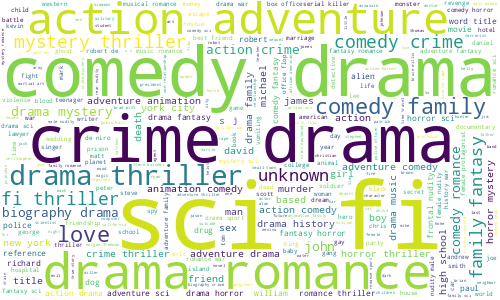

In [208]:
# Visualize the title of all the recipes in the dataset
# Join the different processed title together
long_string_title = ','.join(list(movies.all_data.values))
wordcloud1 = world_cloud_generate(long_string_title)

# Visualize the worldcloud
wordcloud1.to_image()

## Prepare Text Data for the Machine Learning Model

To feed the text data to a machine learning model, we need to convert text data to numerical data. There are a few ways to do this in natural language processing fields, such as
- the bag-of-words model
- word counts based Tokenization method
- TF-IDF using TfidfVectorizer
- Hashing WORDS

In this demo file, the Tokenization method will be illustrated using the CountVectorizer procided by scikitlearn.


References:
1. Scikit-learn Working with Text Data https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
2. Encode text data https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [209]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

def lemma_tokens(tokens, lemma):
    lemma_result = [lemma.lemmatize(item) for item in tokens]
    return(lemma_result)

def tokenize(text):
    lemma = nltk.WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)

    # English Stop words
    # Re-add the additional stop words since we are recreating the document-term matrix
    stop_words = stopwords.words('english')

    # Remove all stop words: no_stops
    no_stops = [t for t in tokens if t not in stop_words]

    lemma = lemma_tokens(no_stops, lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [210]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = stopwords.words('english')

# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

vect = CountVectorizer(stop_words= stop_words,
                       analyzer='word',
                       max_features = 5000,
                       tokenizer = tokenize,
                       lowercase = True,
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

# Fit and transform
nltk.download('punkt')              #this needs to be added or else the code wont run.
nltk.download('wordnet')
X = vect.fit_transform(movies.all_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [211]:
feature_names = vect.get_feature_names_out()
df_tr = pd.DataFrame(X.toarray(), columns=feature_names)
df_tr

,aaron,aasif,abandoned,abbie,abbott,abby,abduction,abhishek,abigail,able,...,zodiac,zoe,zombie,zone,zoo,zooey,zorro,zucker,zurer,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
#Lemmatizaion is the word reduction method.
#It falls under Natural Language Processing. So does stopwords.
#Using both, we get a list which is converted to numnerical format using box of words, tokenizer or other method.

In [213]:
# check the shape of matrix X
X.shape

(4917, 5000)

In [214]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Implementing box of words below without lemmatizaion:

In [215]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
def preprocess(document):
    #changes document to lower case and removes stopwords'
      # change sentence to lower case
      document = document.lower()
      # tokenize into words
      words = word_tokenize(document)
      # remove stop words
      words = [word for word in words if word not in stopwords.words("english")]
      # join back words to make sentence
      document = " ".join(words)
      return document

In [216]:
df = movies.iloc[0:,:]
# extract the messages from the dataframe
texts = df.all_data
# convert messages into list
messages = [text for text in texts]
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
# creating bag of words model
vectorizer2 = CountVectorizer()
bow_model = vectorizer2.fit_transform(messages)
bow_model

<4917x16361 sparse matrix of type '<class 'numpy.int64'>'
	with 95188 stored elements in Compressed Sparse Row format>

In [217]:
feature_names = vectorizer2.get_feature_names_out()
df_bow = pd.DataFrame(bow_model.toarray(), columns=feature_names)
df_bow

,000,007,10,100,1000,1000000,102,10th,11,1190s,...,zukovic,zulu,zuniga,zupan,zurer,zvyagintsev,zwart,zwick,zwigoff,zylka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X is the text data generated from the text file, and will be feed to the machine learning file later.

Box Model just counts the total ofwords.word counts based Tokenization method also does the same but is easier and faster. Both of these methods transforms the data to numerical value.

**TF-IDF**

In [218]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

def lemma_tokens(tokens, lemma):
    lemma_result = [lemma.lemmatize(item) for item in tokens]
    return(lemma_result)

def tokenize(text):
    lemma = nltk.WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)

    # English Stop words
    # Re-add the additional stop words since we are recreating the document-term matrix
    stop_words = stopwords.words('english')

    # Remove all stop words: no_stops
    no_stops = [t for t in tokens if t not in stop_words]

    lemma = lemma_tokens(no_stops, lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words= stop_words,
                       analyzer='word',
                       max_features = 5000,
                       tokenizer = tokenize,
                       lowercase = True,
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

Y = vect.fit_transform(movies.all_data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [220]:
Y.shape

(4917, 5000)

In [221]:
Y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
feature_names = vect.get_feature_names_out()
df_tfid = pd.DataFrame(Y.toarray(), columns=feature_names)
df_tfid

,aaron,aasif,abandoned,abbie,abbott,abby,abduction,abhishek,abigail,able,...,zodiac,zoe,zombie,zone,zoo,zooey,zorro,zucker,zurer,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For the text cell 41:

In [223]:
row = 41
for i in range(100):
    cell_value = df_tr.iat[row, i]
    if cell_value > 0:
        print(cell_value)
        print(row,i)


1
41 13
1
41 29
1
41 51


In [224]:
df_tfid.iat[41, 51]
                          #this is the tfid method
                          #The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word,
                          #which helps to adjust for the fact that some words appear more frequently in general.
                          #different number for each word

0.10645916347552739

Term Frequency (TF): This measures the frequency of a term within a document. It indicates how often a particular term appears in a document relative to the total number of terms in that document. Higher values indicate a higher frequency of the term within the document.

Inverse Document Frequency (IDF): This measures the significance of a term across the entire corpus. It indicates how common or rare a term is across all documents. Terms that are common across many documents have lower IDF values, while terms that are rare and appear in only a few documents have higher IDF values.

multiply both.

Higher scores indicate that the term is relatively more important within the document and/or relatively rarer across the corpus, while lower scores indicate the opposite.

In [225]:
df_tr.iat[41, 51]         #this is the token method, implementation of bag of words either 0 or 1, either has the word or not.

1


**Hashing**

In [226]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

def lemma_tokens(tokens, lemma):
    lemma_result = [lemma.lemmatize(item) for item in tokens]
    return(lemma_result)

def tokenize(text):
    lemma = nltk.WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)

    # English Stop words
    # Re-add the additional stop words since we are recreating the document-term matrix
    stop_words = stopwords.words('english')

    # Remove all stop words: no_stops
    no_stops = [t for t in tokens if t not in stop_words]

    lemma = lemma_tokens(no_stops, lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [227]:
from sklearn.feature_extraction.text import HashingVectorizer

vect3 = HashingVectorizer(stop_words= stop_words,
                       analyzer='word',
                       n_features=20,       #uses n_features except of max_features.
                       tokenizer = tokenize,
                       lowercase = True,
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

Z = vect3.fit_transform(movies.all_data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [228]:
Z.shape

(4917, 20)

In [229]:
Z.toarray()

array([[ 0.        ,  0.        , -0.2236068 , ..., -0.2236068 ,
        -0.4472136 ,  0.        ],
       [ 0.        ,  0.        , -0.28867513, ...,  0.28867513,
        -0.28867513, -0.28867513],
       [ 0.19245009,  0.38490018,  0.        , ..., -0.19245009,
        -0.38490018,  0.38490018],
       ...,
       [ 0.35355339, -0.35355339,  0.        , ..., -0.35355339,
         0.        ,  0.        ],
       [-0.47140452,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21821789, -0.21821789,  0.        , ...,  0.21821789,
         0.43643578,  0.21821789]])

Notes from this week:



Out movies.alldata is a list of words.
First we use stopwords to remove all those words like the,a, from the list and only keep meaningful dataset.
Then we lemmatize the data meaning cats will be cat and furry will be fur.
The main word will only remain. (Stemming removes suffix/prefix which is not good) from nltk import WordNetLemmatizer does the job.

Then we have a good data ready to be converted to number form.
Different ways to do that:
Box-of-words: Calculate all words. Old method. Not to efficient. Mainly used in the spam filtering apps.
Tokenization: Convert list of words into single word. Tokenization is typically the first step in text preprocessing and is crucial for various NLP tasks such as language modeling, information retrieval, and machine translation. Then we can apply stopwords and lemmatization to the tokens and create a good data set. This is the implementation of box of words with  only the good words present.

Next, we have tf-ifd:

Term Frequency (TF): This measures the frequency of a term within a document. It indicates how often a particular term appears in a document relative to the total number of terms in that document. Higher values indicate a higher frequency of the term within the document.

Inverse Document Frequency (IDF): This measures the significance of a term across the entire corpus. It indicates how common or rare a term is across all documents. Terms that are common across many documents have lower IDF values, while terms that are rare and appear in only a few documents have higher IDF values.

tf*df and convert all data into a scale from 0-1 gives a good statistical estimate for the occurance and rarity of data in the data set.

hashing is used for memory saving method.Hashing words is a technique used for dimensionality reduction and memory efficiency, but it does not capture term frequencies or document-level information as effectively as TF-IDF.

Overall, TF-IDF using the TfidfVectorizer is a suitable tokenization method for a movie recommendation system, considering its ability to capture term importance, handle word frequencies, provide a sparse representation, and handle different word forms in a dataset of top 5000 movies.

In [230]:
print("Hello World")

Hello World
